In [9]:
import pandas as pd

df = pd.read_csv("../Data/daily_data.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 2888 non-null   object 
 1   suction_tension (20cm)   2888 non-null   float64
 2   suction_tension (40cm)   2888 non-null   float64
 3   suction_tension (70cm)   2888 non-null   float64
 4   water_temperature        2888 non-null   float64
 5   barometric_pressure_qfe  2888 non-null   float64
 6   dew_point                2888 non-null   float64
 7   water_level              2888 non-null   float64
 8   inflow_linth (m3/s)      2888 non-null   float64
 9   outflow_limmat (m3/s)    2888 non-null   float64
 10  precipitation (mm)       2888 non-null   float64
 11  change_rate              2887 non-null   float64
 12  Evapotranspiration (mm)  0 non-null      float64
dtypes: float64(12), object(1)
memory usage: 293.4+ KB


In [11]:
# import pytz package for handling timezones
import pytz
# convert DateTime column into datetime format
df["datetime"] = pd.to_datetime(df['datetime'], utc=True)
# function that converts datetime column into CET timezone and accounts for Daylight saving
def add_timezone(df):
    timeZone = pytz.timezone("CET")
    df['datetime'] = df['datetime'].dt.tz_convert(timeZone)
    return df

add_timezone(df)

# set DateTime as index
df.set_index("datetime", inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2888 entries, 2012-01-01 00:00:00+01:00 to 2019-11-27 00:00:00+01:00
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   suction_tension (20cm)   2888 non-null   float64
 1   suction_tension (40cm)   2888 non-null   float64
 2   suction_tension (70cm)   2888 non-null   float64
 3   water_temperature        2888 non-null   float64
 4   barometric_pressure_qfe  2888 non-null   float64
 5   dew_point                2888 non-null   float64
 6   water_level              2888 non-null   float64
 7   inflow_linth (m3/s)      2888 non-null   float64
 8   outflow_limmat (m3/s)    2888 non-null   float64
 9   precipitation (mm)       2888 non-null   float64
 10  change_rate              2887 non-null   float64
 11  Evapotranspiration (mm)  0 non-null      float64
dtypes: float64(12)
memory usage: 293.3 KB


In [13]:
# resampling dataframe to weekly data by subsetting original dataframe into dataframes where we have to sum the daily (dfDS) 
# and dataframes where we have to take the mean of hourly data
dfWS = df[["precipitation (mm)", "Evapotranspiration (mm)"]].resample("W").sum()

dfWM = df[['suction_tension (20cm)', 'suction_tension (40cm)',
       'suction_tension (70cm)', 'water_temperature',
       'barometric_pressure_qfe', 'dew_point',
       'water_level', "inflow_linth (m3/s)", "outflow_limmat (m3/s)"]].resample("W").mean().interpolate(option="spline")

In [14]:
# merge the two datasets again 
dfW = pd.merge(dfWM, dfWS, on=dfWM.index)
# set datetime as index
dfW.set_index("key_0", inplace=True)
# change index name
dfW.index.names = ['datetime']
# create variable for change rate of water level since we didn´t want to use the one with hourly data and convert it to daily data
dfW["change_rate"] = dfW["water_level"].pct_change()
dfW.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 414 entries, 2012-01-01 00:00:00+01:00 to 2019-12-01 00:00:00+01:00
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   suction_tension (20cm)   414 non-null    float64
 1   suction_tension (40cm)   414 non-null    float64
 2   suction_tension (70cm)   414 non-null    float64
 3   water_temperature        414 non-null    float64
 4   barometric_pressure_qfe  414 non-null    float64
 5   dew_point                414 non-null    float64
 6   water_level              414 non-null    float64
 7   inflow_linth (m3/s)      414 non-null    float64
 8   outflow_limmat (m3/s)    414 non-null    float64
 9   precipitation (mm)       414 non-null    float64
 10  Evapotranspiration (mm)  414 non-null    float64
 11  change_rate              413 non-null    float64
dtypes: float64(12)
memory usage: 42.0 KB


In [24]:
dfW.to_csv("../Data/weekly_data.csv", index=True)

<AxesSubplot: xlabel='datetime'>

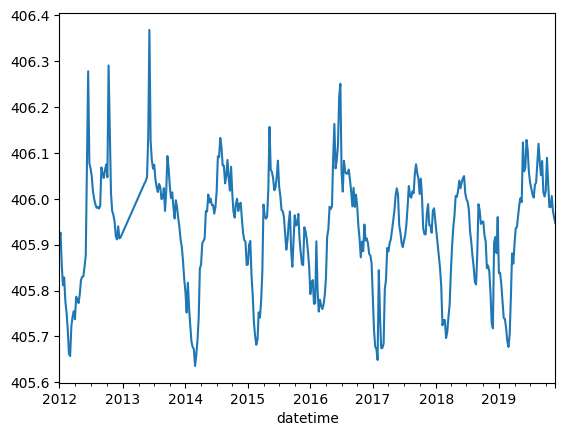

In [16]:
dfW["water_level"].plot()